In [16]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import numpy as np
from scipy.stats import binned_statistic, binned_statistic_2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from src.pf_stats import *
from src.plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


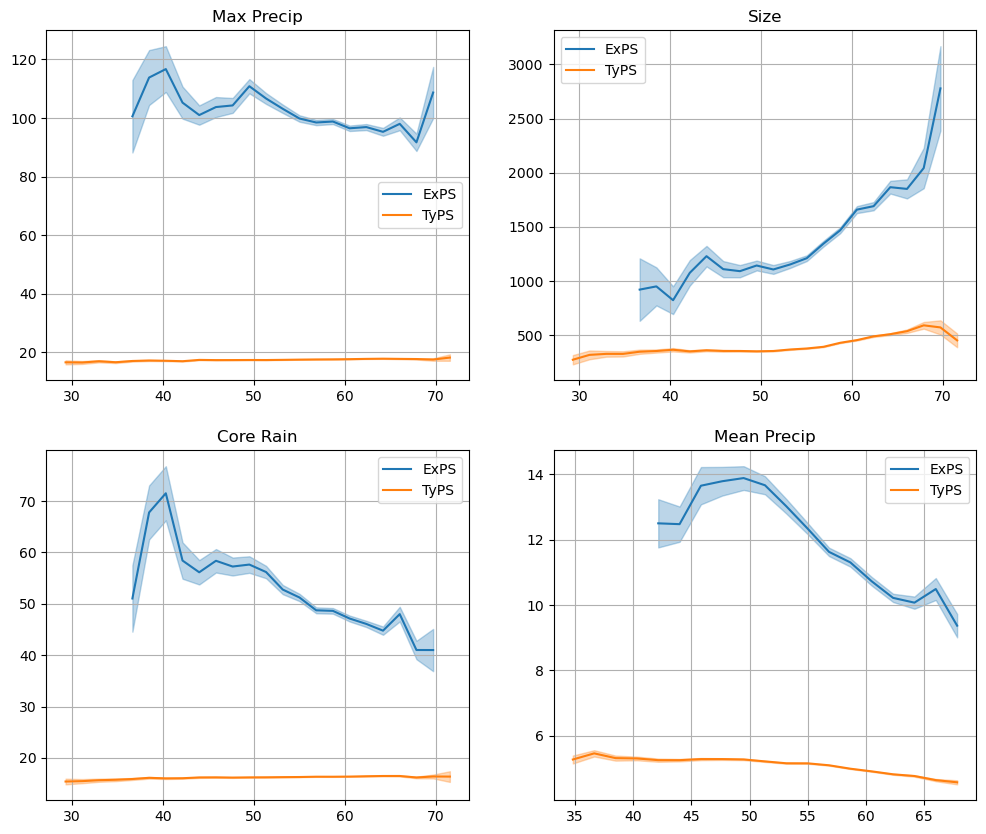

In [47]:
fig, axs = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(12, 10)
)
for data, label in zip(
    [load_mc_exps_tcwv(), load_mc_typs_tcwv()],
    ['ExPS', 'TyPS']
):
    
    tcwv = data['tcwv']
    max_pr = data['max_precip']
    size = data['num_pixels'] * 25
    core_rain = data['rainiest_10mmhr_cluster_precip_8conn'] / data['rainiest_10mmhr_cluster_size_8conn']
    mean_precip = data['total_precip'] / data['num_pixels']

    tcwv_bins = np.linspace(
        10,
        100
    )
    
    # Max Precip subplot (top left)
    binned_max_pr = binned_statistic(
        tcwv, 
        max_pr, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 10 else np.nan
    ).statistic
    std_max_pr = binned_statistic(
        tcwv, 
        max_pr, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanstd(x) if x.size > 10 else np.nan
    ).statistic
    count_max_pr = binned_statistic(
        tcwv, 
        max_pr, 
        bins=tcwv_bins,
        statistic='count'
    ).statistic
    se_max_pr = std_max_pr / np.sqrt(count_max_pr)
    ax_line_max, = axs[0, 0].plot(
        array_midpoints(tcwv_bins), 
        binned_max_pr, 
        label=label
    )
    axs[0, 0].fill_between(
        array_midpoints(tcwv_bins), 
        binned_max_pr - se_max_pr, 
        binned_max_pr + se_max_pr, 
        alpha=0.3,
        color=ax_line_max.get_color()
    )
    
    # Size subplot (top right)
    binned_size = binned_statistic(
        tcwv, 
        size, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 10 else np.nan
    ).statistic
    std_size = binned_statistic(
        tcwv, 
        size, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanstd(x) if x.size > 10 else np.nan
    ).statistic
    count_size = binned_statistic(
        tcwv, 
        size, 
        bins=tcwv_bins,
        statistic='count'
    ).statistic
    se_size = std_size / np.sqrt(count_size)
    ax_line_size, = axs[0, 1].plot(
        array_midpoints(tcwv_bins), 
        binned_size, 
        label=label
    )
    axs[0, 1].fill_between(
        array_midpoints(tcwv_bins), 
        binned_size - se_size, 
        binned_size + se_size, 
        alpha=0.3,
        color=ax_line_size.get_color()
    )
    
    # Core Rain subplot (bottom left)
    binned_core_rain = binned_statistic(
        tcwv, 
        core_rain, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 10 else np.nan
    ).statistic
    std_core_rain = binned_statistic(
        tcwv, 
        core_rain, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanstd(x) if x.size > 10 else np.nan
    ).statistic
    count_core_rain = binned_statistic(
        tcwv, 
        core_rain, 
        bins=tcwv_bins,
        statistic='count'
    ).statistic
    se_core_rain = std_core_rain / np.sqrt(count_core_rain)
    ax_line_core, = axs[1, 0].plot(
        array_midpoints(tcwv_bins), 
        binned_core_rain, 
        label=label
    )
    axs[1, 0].fill_between(
        array_midpoints(tcwv_bins), 
        binned_core_rain - se_core_rain, 
        binned_core_rain + se_core_rain, 
        alpha=0.3,
        color=ax_line_core.get_color()
    )
    
    # Mean Precip subplot (bottom right)
    binned_mean_precip = binned_statistic(
        tcwv, 
        mean_precip, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 100 else np.nan
    ).statistic
    std_mean_precip = binned_statistic(
        tcwv, 
        mean_precip, 
        bins=tcwv_bins,
        statistic=lambda x: np.nanstd(x) if x.size > 100 else np.nan
    ).statistic
    count_mean_precip = binned_statistic(
        tcwv, 
        mean_precip, 
        bins=tcwv_bins,
        statistic='count'
    ).statistic
    se_mean_precip = std_mean_precip / np.sqrt(count_mean_precip)
    ax_line_mean, = axs[1, 1].plot(
        array_midpoints(tcwv_bins), 
        binned_mean_precip, 
        label=label
    )
    axs[1, 1].fill_between(
        array_midpoints(tcwv_bins), 
        binned_mean_precip - se_mean_precip, 
        binned_mean_precip + se_mean_precip, 
        alpha=0.3,
        color=ax_line_mean.get_color()
    )
    
axs[0, 0].set_title(
    'Max Precip'
)
axs[0, 1].set_title(
    'Size'
)
axs[1, 0].set_title(
    'Core Rain'
)
axs[1, 1].set_title(
    'Mean Precip'
)

for ax in axs.flatten():
    ax.grid(
        True
    )
    ax.legend()


In [35]:
tcwv.mean()

56.13069466864203

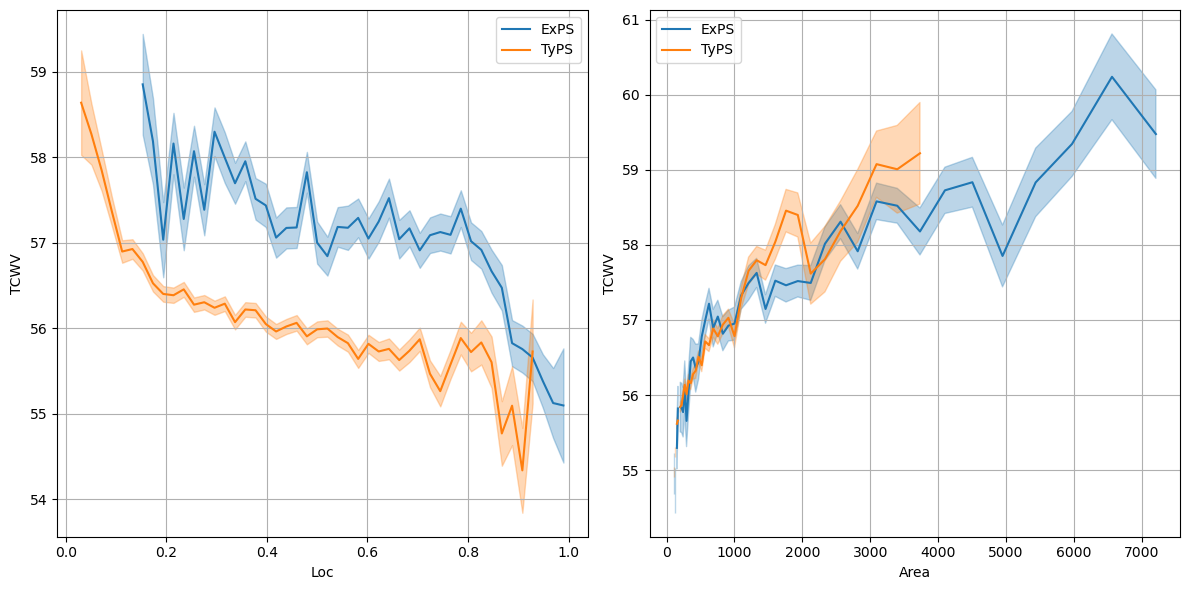

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
for data, label in zip([load_mc_exps_tcwv(), load_mc_typs_tcwv()], ['ExPS', 'TyPS']):
    loc = data['rainiest_10mmhr_cluster_precip_8conn'] / data['total_precip']
    area = data['num_pixels'] * 25
    tcwv = data['tcwv']
    
    loc_bins = np.linspace(0, 1, 50)
    area_bins = np.logspace(2, 4, 50)
    
    mid_loc = array_midpoints(loc_bins)
    mid_area = array_midpoints(area_bins)
    
    # Binning by loc
    mean_tcwv_loc = binned_statistic(
        loc,
        tcwv,
        bins=loc_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 50 else np.nan
    ).statistic
    std_tcwv_loc = binned_statistic(
        loc,
        tcwv,
        bins=loc_bins,
        statistic=lambda x: np.nanstd(x) if x.size > 50 else np.nan
    ).statistic

    count_loc = binned_statistic(
        loc,
        tcwv,
        bins=loc_bins,
        statistic='count'
    ).statistic
    
    se_loc = std_tcwv_loc / np.sqrt(count_loc)
    
    line_loc, = axs[0].plot(mid_loc, mean_tcwv_loc, label=label)
    axs[0].fill_between(
        mid_loc,
        mean_tcwv_loc - se_loc,
        mean_tcwv_loc + se_loc, 
        alpha=0.3,
        color=line_loc.get_color()
    )
    
    # Binning by area
    mean_tcwv_area = binned_statistic(
        area,
        tcwv,
        bins=area_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 50 else np.nan
    ).statistic
    std_tcwv_area = binned_statistic(
        area,
        tcwv,
        bins=area_bins,
        statistic=lambda x: np.nanstd(x) if x.size > 50 else np.nan
    ).statistic
    count_area = binned_statistic(
        area,
        tcwv,
        bins=area_bins,
        statistic='count'
    ).statistic

    se_area = std_tcwv_area / np.sqrt(count_area)
    
    line_area, = axs[1].plot(mid_area, mean_tcwv_area, label=label)
    axs[1].fill_between(
        mid_area, 
        mean_tcwv_area - se_area, 
        mean_tcwv_area + se_area, 
        alpha=0.3,
        color=line_area.get_color()
    )

axs[0].set_xlabel('Loc')
axs[0].set_ylabel('TCWV')
axs[1].set_xlabel('Area')
axs[1].set_ylabel('TCWV')
axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()
plt.tight_layout()



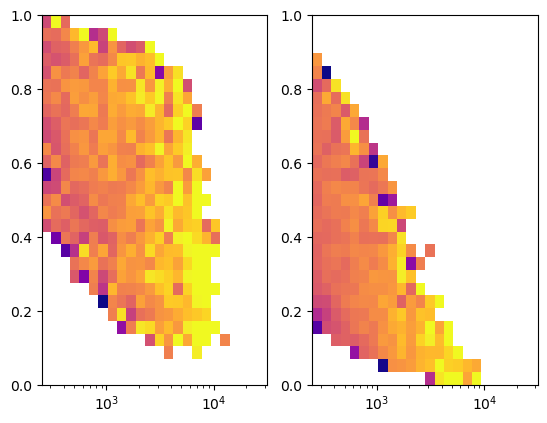

In [22]:
fig, axs = plt.subplots(ncols=2)
for i, (data, label) in enumerate(zip([load_mc_exps_tcwv(), load_mc_typs_tcwv()], ['ExPS', 'TyPS'])):
    ax = axs[np.unravel_index(i, axs.shape)]

    loc = data['rainiest_10mmhr_cluster_precip_8conn']/data['total_precip']
    area = data['num_pixels'] * 25
    tcwv = data['tcwv']

    loc_bins = np.linspace(0, 1, 30)
    area_bins = np.logspace(np.log10(250), 4.5, 25)
    mean_tcwv = binned_statistic_2d(
        loc,
        area,
        tcwv,
        bins=[loc_bins, area_bins],
        statistic=lambda x: np.nanmean(x) if x.size > 1 else np.nan
    ).statistic

    x_mesh, y_mesh = np.meshgrid(area_bins, loc_bins)

    ax.pcolormesh(
        x_mesh,
        y_mesh, 
        mean_tcwv,
        cmap=plt.cm.plasma,
        norm=colors.Normalize(50, 60)
    )
    ax.set_xscale('log')

    
    

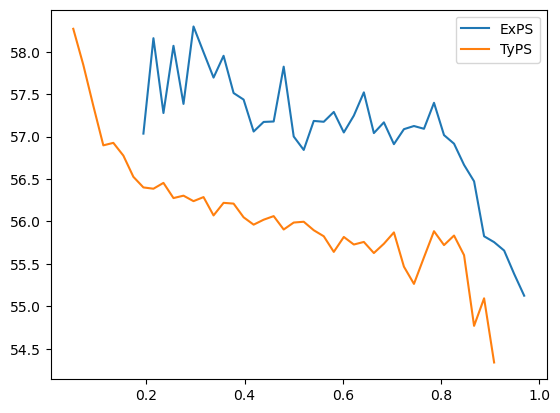

In [23]:
fig, ax = plt.subplots()
for data, label in zip([load_mc_exps_tcwv(), load_mc_typs_tcwv()], ['ExPS', 'TyPS']):

    loc = data['rainiest_10mmhr_cluster_precip_8conn']/data['total_precip']
    tcwv = data['tcwv']

    loc_bins = np.linspace(0, 1, 50)

    mean_tcwv = binned_statistic(
        loc,
        tcwv,
        bins=loc_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 100 else np.nan
    ).statistic

    ax.plot(array_midpoints(loc_bins), mean_tcwv, label=label)

    ax.legend()



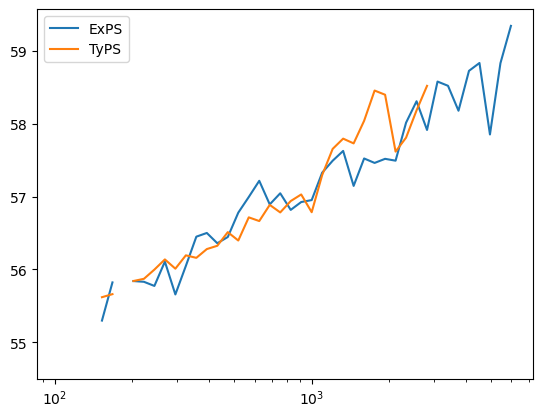

In [14]:
fig, ax = plt.subplots()
for data, label in zip([load_mc_exps_tcwv(), load_mc_typs_tcwv()], ['ExPS', 'TyPS']):

    area = data['num_pixels'] * 25
    tcwv = data['tcwv']

    area_bins = np.logspace(2, 4, 50)

    mean_tcwv = binned_statistic(
        area,
        tcwv,
        bins=area_bins,
        statistic=lambda x: np.nanmean(x) if x.size > 100 else np.nan
    ).statistic

    ax.plot(array_midpoints(area_bins), mean_tcwv, label=label)

    ax.legend()
    ax.set_xscale('log')

